<a href="https://colab.research.google.com/github/liadekel/analyzing-big-data/blob/master/HW_9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework Assignment 9

**Question 1:** Select a short video with at least 3 persons and create a new movie from this video with a face tracker (each person’s face needs to be tracked by a rectangle of a different color) (50pt). See, for example, the video in: https://github.com/ageitgey/face_recognition

**Bonus:** Select a video with at least two animals (dog/cat/lion/tiger...), and create a video with an animal tracker (10pt).

In [2]:
!pip install turicreate
!pip install youtube-dl
!pip install opencv-python
!pip install face_recognition
!pip install ipython

  Using cached https://files.pythonhosted.org/packages/43/16/b07e3f7a4a024b47918f7018967eb984b0c542458a6141d8c48515aa81d4/tensorflow-2.0.1-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tensorflow_estimator-2.0.1-py2.py3-none-any.whl
Processing /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd/gast-0.2.2-cp36-none-any.whl
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow-gpu 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow-gpu 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow-gpu 2

In [3]:
!pip install tensorflow

In [4]:
# Installing the Kaggle package
import json
!pip install kaggle 
!mkdir /root/.kaggle/

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"liaddekel","key":"bf0297555b2915c6c31a8f6579de9483"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [5]:
! git clone https://github.com/intel-iot-devkit/sample-videos
! ls -l sample-videos/

fatal: destination path 'sample-videos' already exists and is not an empty directory.
total 156684
-rw-r--r-- 1 root root  9285374 Jun  7 08:37 bolt-detection.mp4
-rw-r--r-- 1 root root 16113270 Jun  7 08:37 bolt-multi-size-detection.mp4
-rw-r--r-- 1 root root   504961 Jun  7 08:37 bottle-detection.mp4
-rw-r--r-- 1 root root  2811553 Jun  7 08:37 car-detection.mp4
-rw-r--r-- 1 root root 13548133 Jun  7 08:37 classroom.mp4
-rw-r--r-- 1 root root  9406029 Jun  7 08:37 face-demographics-walking-and-pause.mp4
-rw-r--r-- 1 root root  6406124 Jun  7 08:37 face-demographics-walking.mp4
-rw-r--r-- 1 root root 17760065 Jun  7 08:37 fruit-and-vegetable-detection.mp4
-rw-r--r-- 1 root root 16788193 Jun  7 08:37 head-pose-face-detection-female-and-male.mp4
-rw-r--r-- 1 root root 15628037 Jun  7 08:37 head-pose-face-detection-female.mp4
-rw-r--r-- 1 root root 15522596 Jun  7 08:37 head-pose-face-detection-male.mp4
-rw-r--r-- 1 root root    18651 Jun  7 08:37 LICENSE
-rw-r--r-- 1 root root  3291918 

In [6]:
import cv2
import face_recognition

VIDEO_PATH = "./sample-videos/preview/face-demographics-walking-and-pause.gif"

# Open the input movie file
input_movie = cv2.VideoCapture(VIDEO_PATH)
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

length

41

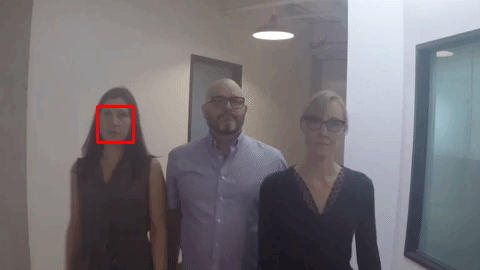

Writing frame 1 / 41


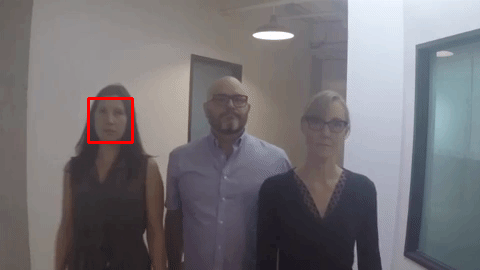

Writing frame 2 / 41


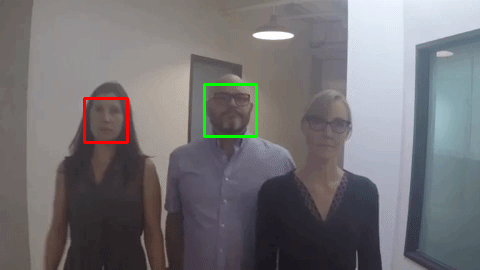

Writing frame 3 / 41


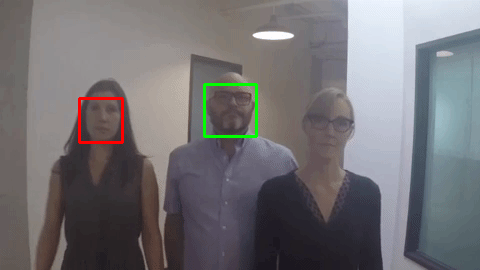

Writing frame 4 / 41


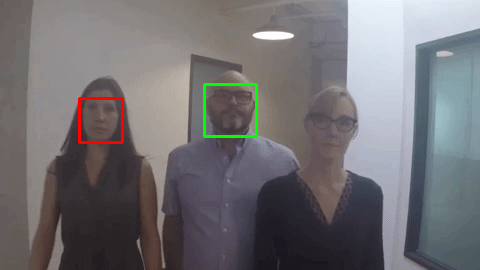

Writing frame 5 / 41


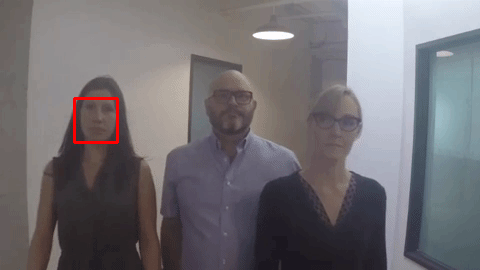

Writing frame 6 / 41


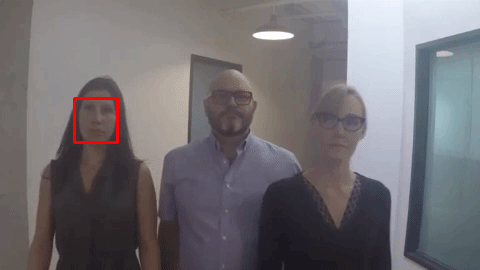

Writing frame 7 / 41


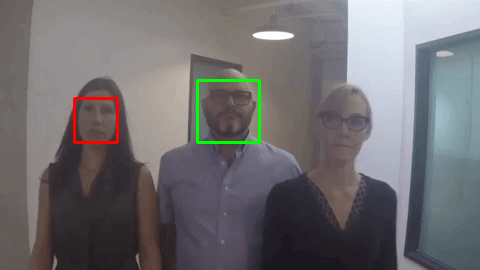

Writing frame 8 / 41


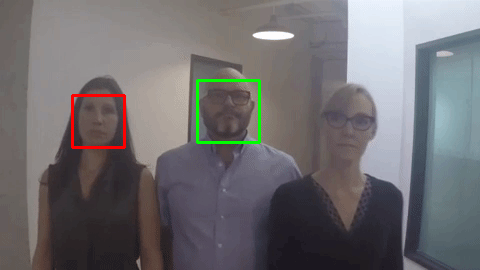

Writing frame 9 / 41


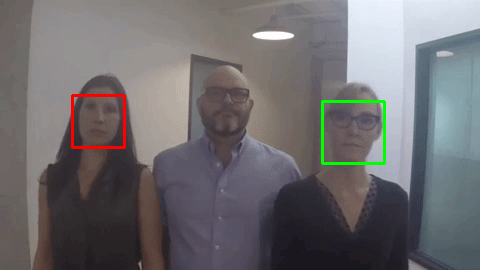

Writing frame 10 / 41


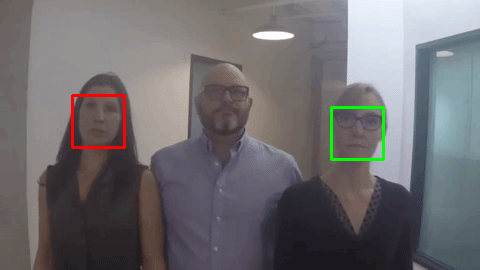

Writing frame 11 / 41


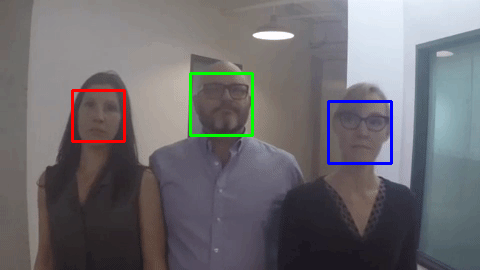

Writing frame 12 / 41


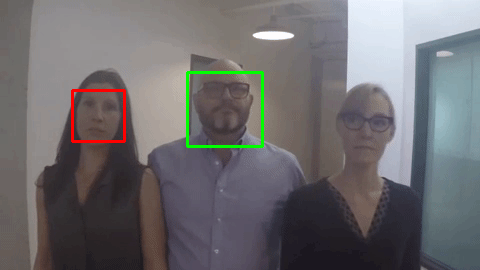

Writing frame 13 / 41


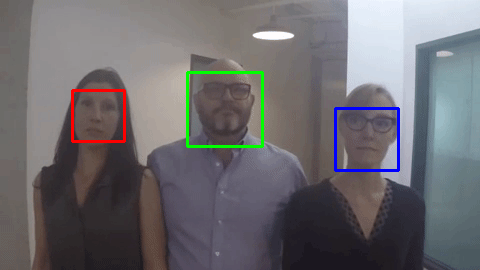

Writing frame 14 / 41


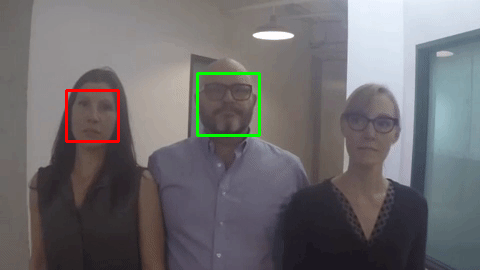

Writing frame 15 / 41


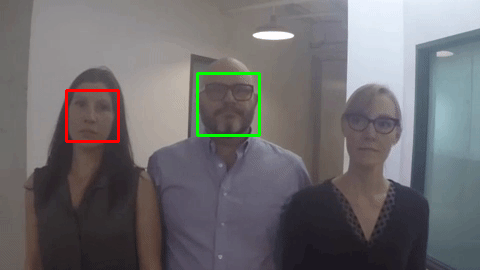

Writing frame 16 / 41


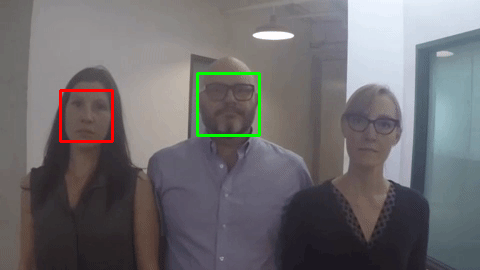

Writing frame 17 / 41


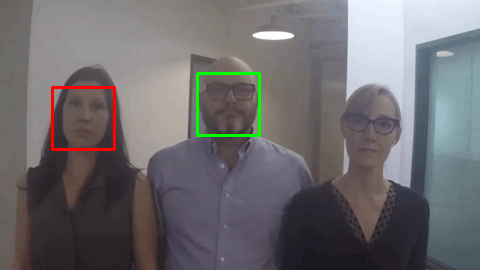

Writing frame 18 / 41


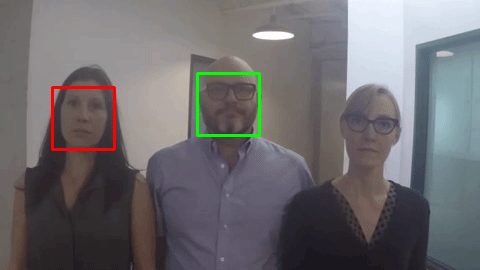

Writing frame 19 / 41


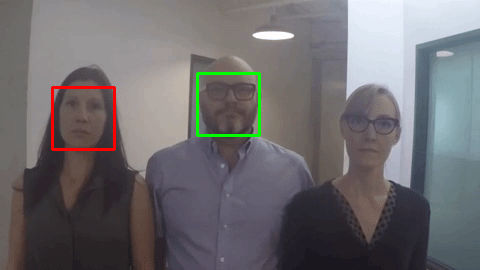

Writing frame 20 / 41


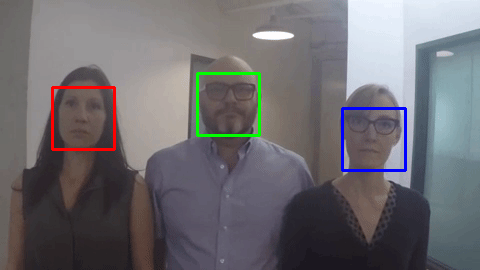

Writing frame 21 / 41


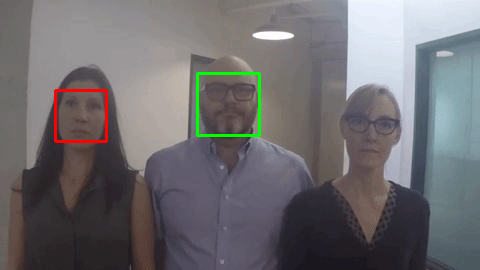

Writing frame 22 / 41


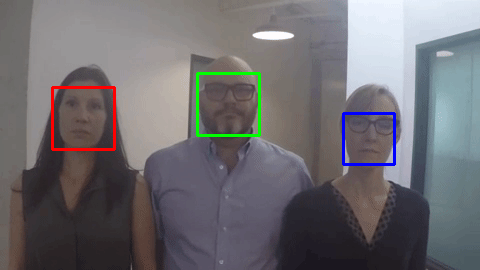

Writing frame 23 / 41


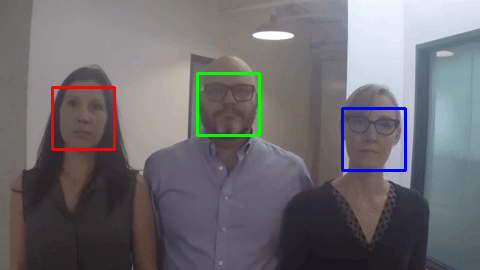

Writing frame 24 / 41


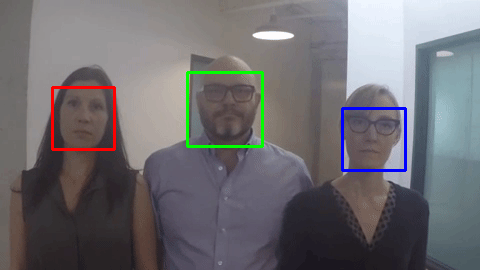

Writing frame 25 / 41


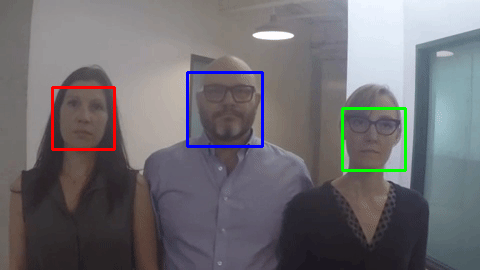

Writing frame 26 / 41


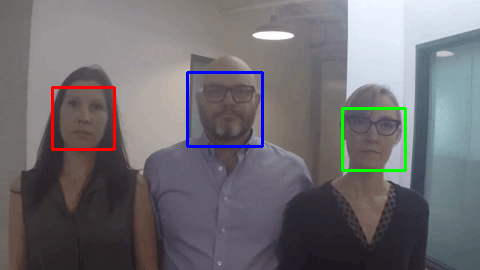

Writing frame 27 / 41


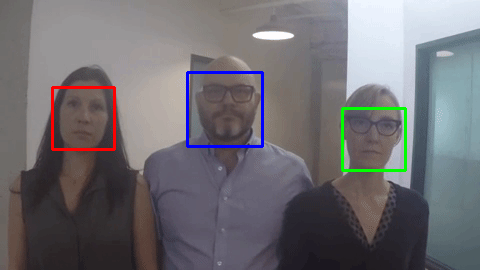

Writing frame 28 / 41


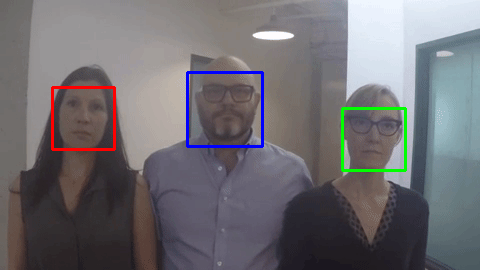

Writing frame 29 / 41


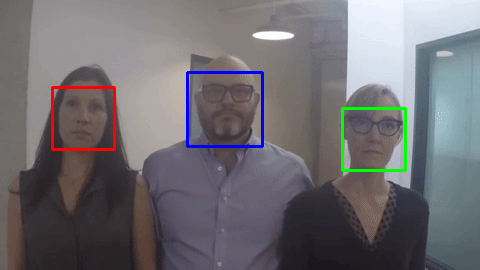

Writing frame 30 / 41


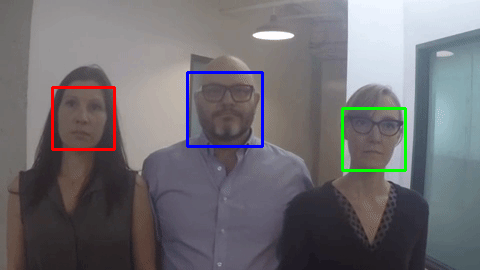

Writing frame 31 / 41


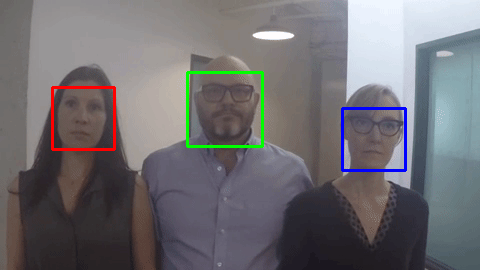

Writing frame 32 / 41


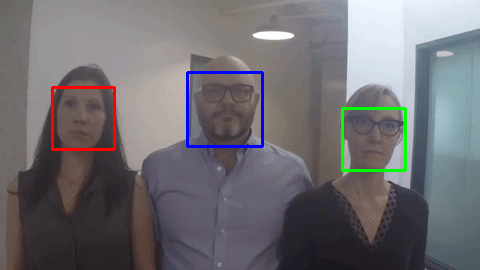

Writing frame 33 / 41


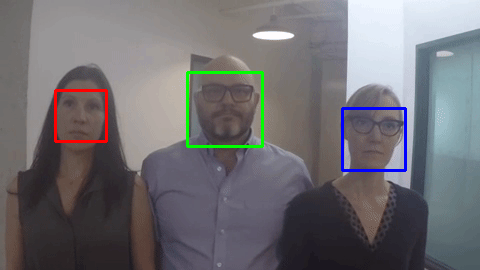

Writing frame 34 / 41


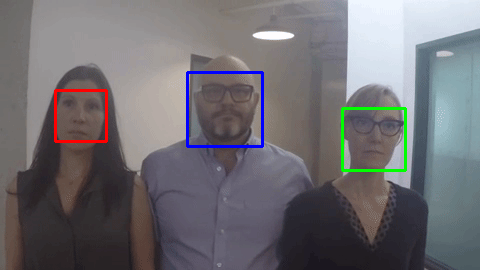

Writing frame 35 / 41


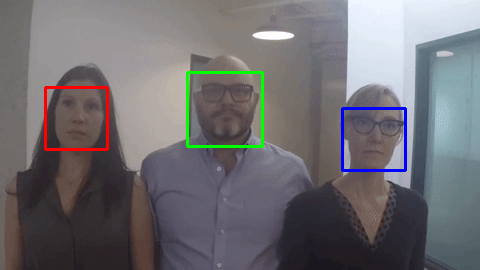

Writing frame 36 / 41


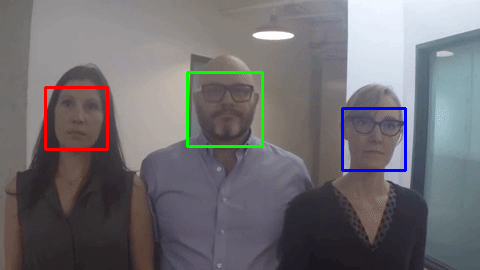

Writing frame 37 / 41


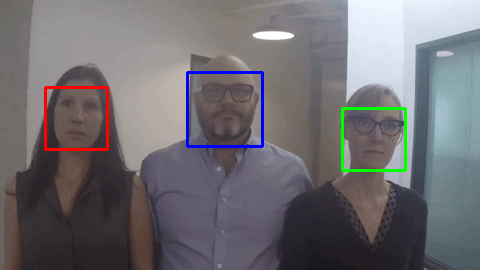

Writing frame 38 / 41


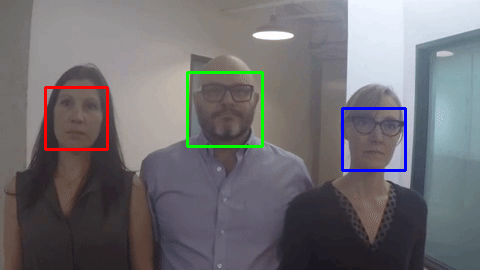

Writing frame 39 / 41


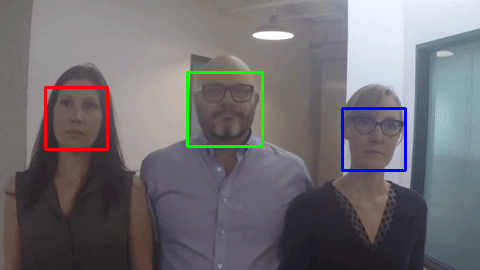

Writing frame 40 / 41


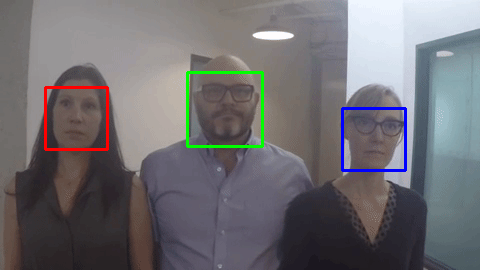

Writing frame 41 / 41
out


In [7]:
# Initialize some variables
from IPython.display import clear_output, Image, display, HTML
import base64

def arrayShow (imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return Image(data=encoded.decode('ascii'))

colors = [
     (0,0,255),
     (0,255,0),
     (255,0,0)   
]
face_locations = []
face_encodings = []
face_names = []
frame_number = 0

height, width, layers = 0,0,0
frames = []

while True:
    # Grab a single frame of video
    ret, frame = input_movie.read()
    frame_number += 1

    
    # Quit when the input video file ends
    if not ret:
        print("out")
        break

    height, width, layers = frame.shape
    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]

    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    if face_locations:
        for i, l in enumerate(face_locations):
            top, right, bottom, left = l
            # Draw a box around the face
            cv2.rectangle(frame, (left, top), (right, bottom), colors[i], 2)
    
    frames.append(frame)
    img = arrayShow(frame)
    display(img)
    # Write the resulting image to the output video file
    print("Writing frame {} / {}".format(frame_number, length))

# All done!

# Create an output movie file (make sure resolution/frame rate matches input video!)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_movie = cv2.VideoWriter("output.mp4", fourcc, 20, (width, height))

for frame in frames:
    output_movie.write(frame)

output_movie.release()
cv2.destroyAllWindows()

In [8]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# I'm not sure why the video is not playing well in the colab.
# When downloaded from the file browser to the computer it works great :)

**Question 2:** Select a collection of connected images. Create a graph of the links among images or objects in images (42pt). Use graph algorithms to discover interesting insights regarding the images. See, for example, [Figure 2](https://arxiv.org/pdf/1509.00568.pdf) (8pt).

In [9]:
!mkdir ./datasets
!mkdir ./datasets/pokemon

# download the dataset from Kaggle and unzip it
!kaggle datasets download vishalsubbiah/pokemon-images-and-types -p ./datasets/pokemon
!unzip ./datasets/pokemon/*.zip  -d ./datasets/pokemon/

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/pokemon’: File exists
pokemon-images-and-types.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/pokemon/pokemon-images-and-types.zip
replace ./datasets/pokemon/images/images/abomasnow.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./datasets/pokemon/images/images/abomasnow.png  
  inflating: ./datasets/pokemon/images/images/abra.png  
  inflating: ./datasets/pokemon/images/images/absol.png  
  inflating: ./datasets/pokemon/images/images/accelgor.png  
  inflating: ./datasets/pokemon/images/images/aegislash-blade.png  
  inflating: ./datasets/pokemon/images/images/aerodactyl.png  
  inflating: ./datasets/pokemon/images/images/aggron.png  
  inflating: ./datasets/pokemon/images/images/aipom.png  
  inflating: ./datasets/pokemon/images/images/alakazam.png  
  inflating: ./datasets/pokemon/images/images/alomomola.png  
  i

In [10]:
import turicreate as tc

sf = tc.image_analysis.load_images(f"./datasets/pokemon/images/images/", with_path=True)
sf['pokemon'] = sf['path'].apply(lambda p: p.split('/')[-1].split('.')[0])
sf

Columns:
	path	str
	image	Image
	pokemon	str

Rows: 809

Data:
+-------------------------------+------------------------+-----------------+
|              path             |         image          |     pokemon     |
+-------------------------------+------------------------+-----------------+
| /content/datasets/pokemon/... | Height: 120 Width: 120 |    abomasnow    |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |       abra      |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |      absol      |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |     accelgor    |
| /content/datasets/pokemon/... | Height: 120 Width: 120 | aegislash-blade |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |    aerodactyl   |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |      aggron     |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |      aipom      |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |     alakazam    |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |    alomomola    |
+-------------------------------+------------------------+-----------------+
[809 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [11]:
from turicreate.toolkits import _image_feature_extractor, _pre_trained_models

def get_images_features_vector(dataset, target, feature="image", model_name='resnet-50'):
    #ptModel = _pre_trained_models.MODELS[model_name]()
    ptModel = tc.toolkits._pre_trained_models.ResNetImageClassifier()
    feature_extractor = tc.toolkits._image_feature_extractor._create_feature_extractor(model_name)
    extracted_features = tc.SFrame({
        target: dataset[target],
        '__image_features__': feature_extractor.extract_features(dataset, feature),
        })
    dataset['image_features'] = extracted_features['__image_features__']
    return dataset

sf = get_images_features_vector(sf, 'pokemon')
sf

Instructions for updating:
non-resource variables are not supported in the long term


Columns:
	path	str
	image	Image
	pokemon	str
	image_features	array

Rows: 809

Data:
+-------------------------------+------------------------+-----------------+
|              path             |         image          |     pokemon     |
+-------------------------------+------------------------+-----------------+
| /content/datasets/pokemon/... | Height: 120 Width: 120 |    abomasnow    |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |       abra      |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |      absol      |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |     accelgor    |
| /content/datasets/pokemon/... | Height: 120 Width: 120 | aegislash-blade |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |    aerodactyl   |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |      aggron     |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |      aipom      |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |     alakazam    |
| /content/datasets/pokemon/... | Height: 120 Width: 120 |    alomomola    |
+-------------------------------+------------------------+-----------------+
+-------------------------------+
|         image_features        |
+-------------------------------+
| [0.891204833984375, 0.0, 1... |
| [0.31177499890327454, 0.0,... |
| [0.20677368342876434, 0.0,... |
| [0.3713248074054718, 0.0, ... |
| [0.4229263663291931, 0.0, ... |
| [0.28364986181259155, 0.0,... |
| [0.2039318084716797, 0.0, ... |
| [0.2981431484222412, 0.0, ... |
| [0.26871249079704285, 0.0,... |
| [0.126150444149971, 0.0, 1... |
+-------------------------------+
[809 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [0]:
sf.save('./datasets/pokemon/pokemon.sframe')

In [13]:
model = tc.image_similarity.create(sf)
model.query(sf[100:101], k=10)

Performing feature extraction on resized images...
Completed  64/809
Completed 128/809
Completed 192/809
Completed 256/809
Completed 320/809
Completed 384/809
Completed 448/809
Completed 512/809
Completed 576/809
Completed 640/809
Completed 704/809
Completed 768/809
Completed 809/809


Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Performing feature extraction on resized images...
Completed 1/1


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.123609    | 18.045ms     |

| Done         |         | 100         | 74.723ms     |

+--------------+---------+-------------+--------------+

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 10

Data:
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |       100       |        0.0         |  1   |
|      0      |       595       | 17.07108061389756  |  2   |
|      0      |       652       | 17.682123999938824 |  3   |
|      0      |       754       | 18.032155391558508 |  4   |
|      0      |       550       |  18.4462223644992  |  5   |
|      0      |       224       | 18.453437603513716 |  6   |
|      0      |       801       | 18.506038469954404 |  7   |
|      0      |       143       | 18.76403503879624  |  8   |
|      0      |        44       | 18.90757594998398  |  9   |
|      0      |       747       | 18.93146314631085  |  10  |
+-------------+-----------------+--------------------+------+
[10 rows x 4 columns]

In [14]:
similarity_graph = model.similarity_graph(k=5)
similarity_graph.summary()

Starting blockwise similarity graph construction.

max rows per data block: 6207

number of reference data blocks: 2

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 326836  | 66.42       | 237.5ms      |

| 492075  | 100         | 368.972ms    |

+---------+-------------+--------------+

{'num_edges': 4045, 'num_vertices': 809}

In [15]:
import networkx as nx
import matplotlib.image as mpimg

g = nx.Graph()
for v in similarity_graph.vertices['__id']:
    img=mpimg.imread(sf[v]['path'])
    g.add_node(v, image=img, attr_dict={'path':sf[v]['path'], 'pokemon': sf[v]['pokemon']})
for e in similarity_graph.edges:
    g.add_edge(e["__src_id"], e["__dst_id"])
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 809\nNumber of edges: 3437\nAverage degree:   8.4969'

In [0]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(g))
d = {i: len(c[i]) for i in range(len(c))}

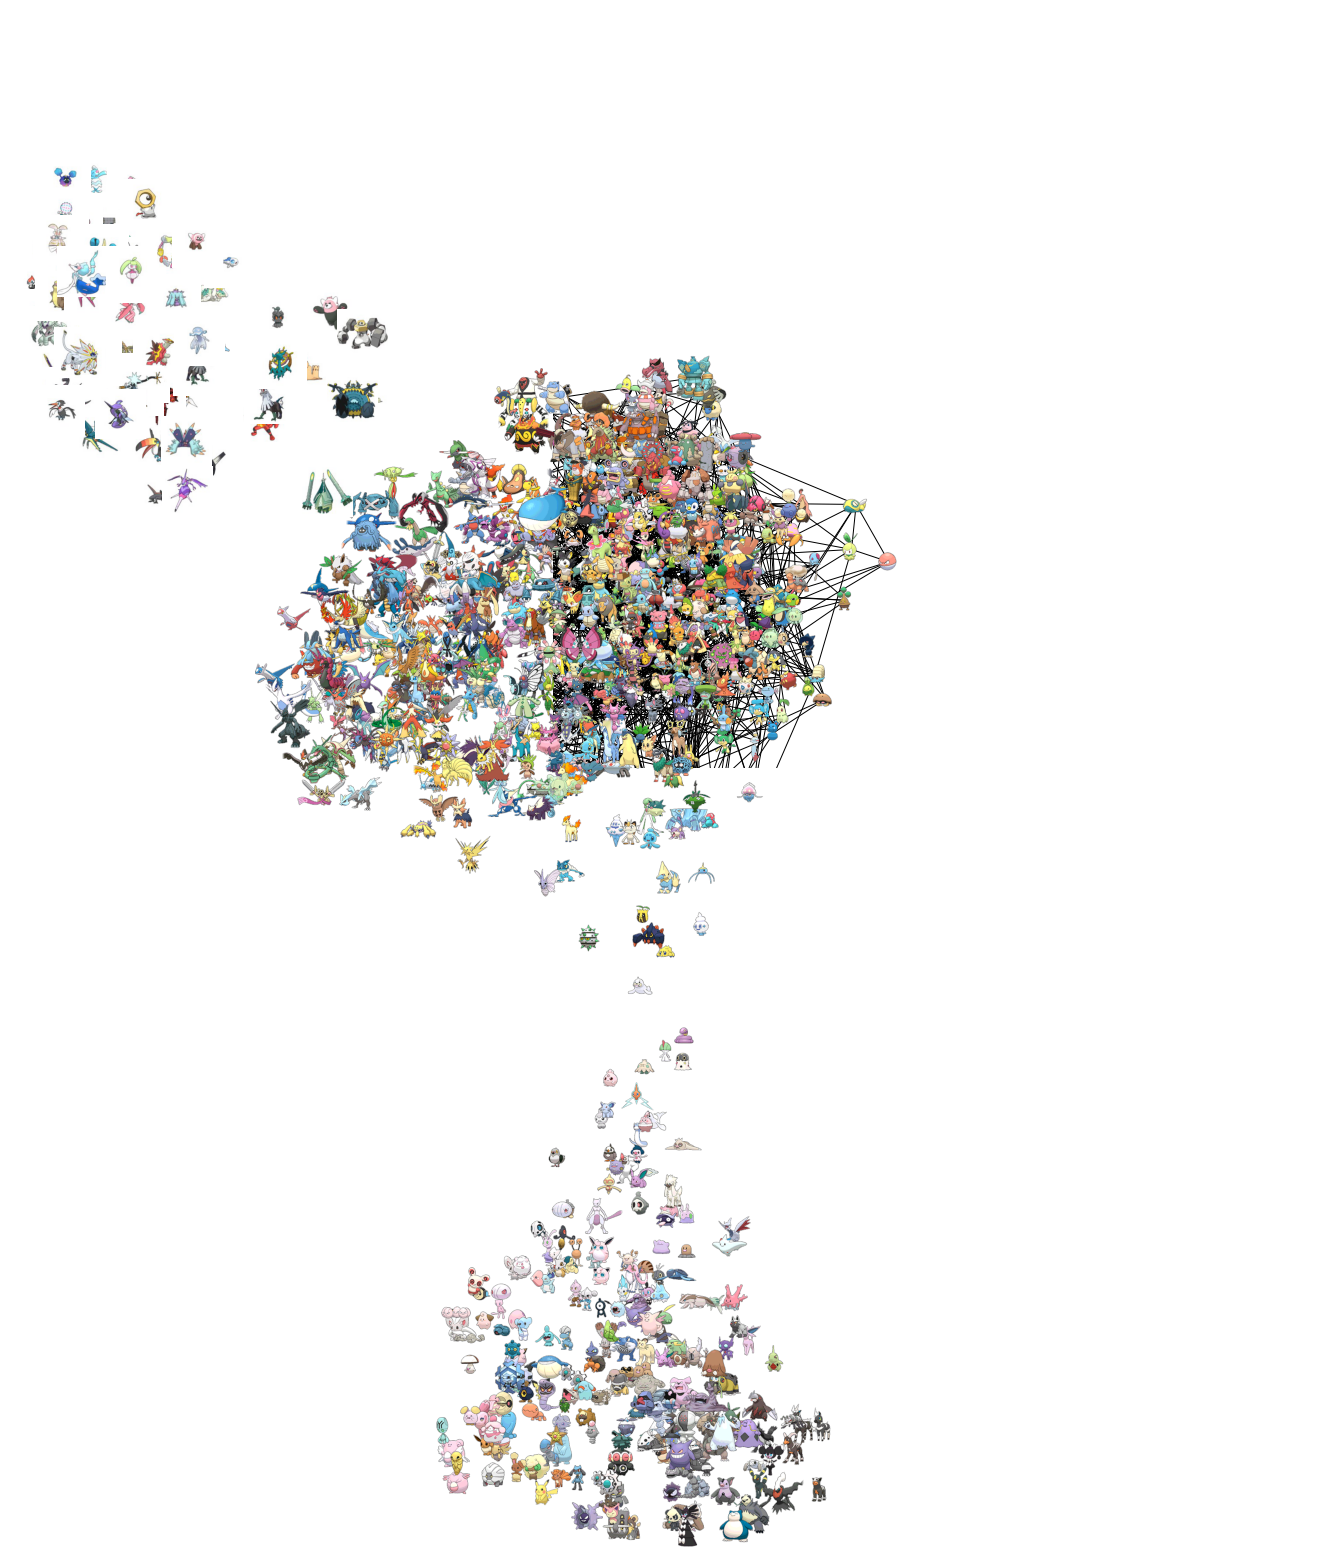

In [17]:
import matplotlib.pyplot as plt

# g = g.subgraph(c[3])
fig=plt.figure(figsize=(14,14))
ax=plt.subplot(111)
ax.set_aspect('equal')
pos=nx.spring_layout(g)
nx.draw_networkx_edges(g,pos,ax=ax)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

piesize=0.05 # this is the image size
p2=piesize/2.0
for n in g:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    a.imshow(g.nodes[n]['image'])
    a.axis('off')
ax.axis('off')
plt.show()

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))

# h = g.subgraph(c[3])
# nx.draw_kamada_kawai(h, with_labels=True)
h = g

n_csv = ["id,pokemon,path"]
for n in h.nodes():
    path = h.nodes[n]['attr_dict']['path'].split("images/images/")[1]
    path = f"http://127.0.0.1:8000/{path}" #ask me in class why I using http:// :)
    pokemon = h.nodes[n]['attr_dict']['pokemon']
    n_csv.append(f"{n},{pokemon},{path}")
open('./pokemon_vertices.csv', "w").write("\n".join(n_csv))             
e_csv = ["src,dst"]
for e1,e2 in h.edges():
    e_csv.append(f"{e1},{e2}")
open('./pokemon_edges.csv', "w").write("\n".join(e_csv))             

26633

<Figure size 1008x1008 with 0 Axes>

Macro image with cytoscape

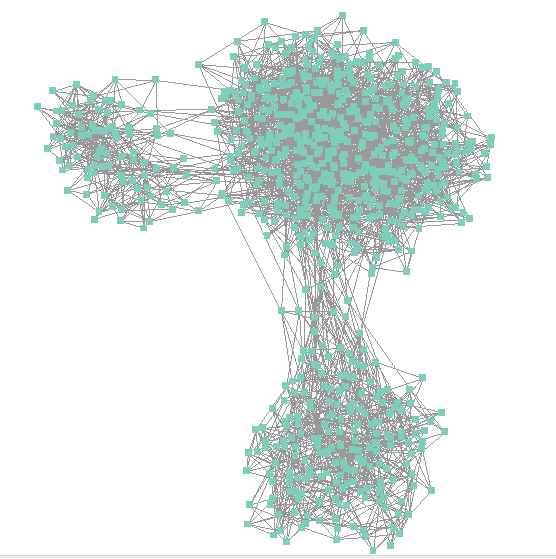

Micro image with cytoscape
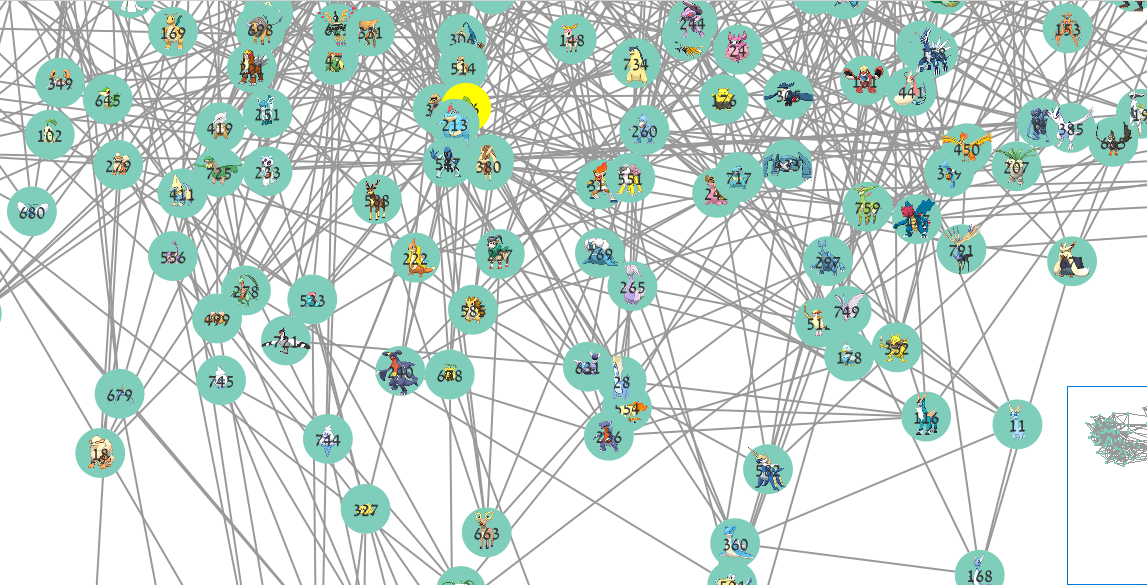